# import

In [1]:
#import necessary libraries 

import numpy as np 
import pandas as pd 
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import re

# read data file

In [2]:
#Set up Kaggle API credentials
#!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

#Download the dataset using the Kaggle API
#!kaggle datasets download -d derrickmwiti/google-2019-cluster-sample

#Extract the downloaded dataset
#!unzip google-2019-cluster-sample.zip

#Access the downloaded files
df = pd.read_csv("borg_traces_data.csv")

# basic info on data

In [3]:
#understanding the basic data structure

df.info

<bound method DataFrame.info of         Unnamed: 0           time  instance_events_type  collection_id  \
0                0              0                     2    94591244395   
1                1  2517305308183                     2   260697606809   
2                2   195684022913                     6   276227177776   
3                3              0                     2    10507389885   
4                4  1810627494172                     3    25911621841   
...            ...            ...                   ...            ...   
405889      405889              0                     2   299950285958   
405890      405890    18279167039                     0   330587213089   
405891      405891   733307641549                     3    13748637767   
405892      405892  1984523129238                     2   323372663325   
405893      405893  1478177324880                     5   478343152042   

        scheduling_class  collection_type  priority  alloc_collection_id  \
0  

In [4]:
df.head()

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [5]:
#drop unnamed column

df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,resource_request,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,2,94591244395,3,1,200,0,144,168846390496,"{'cpus': 0.020660400390625, 'memory': 0.014434...",...,0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,"{'cpus': 0.00724029541015625, 'memory': 0.0013...",...,0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,195684022913,6,276227177776,2,0,103,0,376,169321752432,"{'cpus': 0.048583984375, 'memory': 0.004165649...",...,0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,0,2,10507389885,3,0,200,0,1977,178294817221,"{'cpus': 0.0704345703125, 'memory': 0.04162597...",...,0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,"{'cpus': 0.00244903564453125, 'memory': 0.0002...",...,0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


# drop missing value

In [7]:
#find empty cells

df.isna().sum()

time                                    0
instance_events_type                    0
collection_id                           0
scheduling_class                        0
collection_type                         0
priority                                0
alloc_collection_id                     0
instance_index                          0
machine_id                              0
resource_request                      774
constraint                              0
collections_events_type                 0
user                                    0
collection_name                         0
collection_logical_name                 0
start_after_collection_ids              0
vertical_scaling                      959
scheduler                             959
start_time                              0
end_time                                0
average_usage                           0
maximum_usage                           0
random_sample_usage                     0
assigned_memory                   

In [8]:
df = df.dropna(subset=['resource_request', 'vertical_scaling', 'scheduler'])

In [9]:
df["cycles_per_instruction"]

df["memory_accesses_per_instruction"]

#these two columns have the same NA cells, will determine what to do later

0              NaN
1              NaN
2         0.001318
3         0.007643
4              NaN
            ...   
405889    0.003158
405890    0.001859
405891    0.002941
405892    0.015743
405893         NaN
Name: memory_accesses_per_instruction, Length: 404161, dtype: float64

# change data type 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404161 entries, 0 to 405893
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time                             404161 non-null  int64  
 1   instance_events_type             404161 non-null  int64  
 2   collection_id                    404161 non-null  int64  
 3   scheduling_class                 404161 non-null  int64  
 4   collection_type                  404161 non-null  int64  
 5   priority                         404161 non-null  int64  
 6   alloc_collection_id              404161 non-null  int64  
 7   instance_index                   404161 non-null  int64  
 8   machine_id                       404161 non-null  int64  
 9   resource_request                 404161 non-null  object 
 10  constraint                       404161 non-null  object 
 11  collections_events_type          404161 non-null  int64  
 12  user   

In [11]:
#change categorical columns data type to object 
df_categorical = ["scheduler", "collection_id", "alloc_collection_id", "machine_id", "constraint", "user", "collection_name",
                  "collection_logical_name", "start_after_collection_ids", "event"]

for i in df_categorical:
    df.loc[:, i] = df[i].astype('object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404161 entries, 0 to 405893
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time                             404161 non-null  int64  
 1   instance_events_type             404161 non-null  int64  
 2   collection_id                    404161 non-null  object 
 3   scheduling_class                 404161 non-null  int64  
 4   collection_type                  404161 non-null  int64  
 5   priority                         404161 non-null  int64  
 6   alloc_collection_id              404161 non-null  object 
 7   instance_index                   404161 non-null  int64  
 8   machine_id                       404161 non-null  object 
 9   resource_request                 404161 non-null  object 
 10  constraint                       404161 non-null  object 
 11  collections_events_type          404161 non-null  int64  
 12  user   

# seperate cpu and memory usage columns

In [13]:
#define a function to split the cell between cpu and memory data

def split_cell(data):
    number = re.compile(r"[0-9]")
    if type(data) != float:
        data = data.split(": ")
        cpu = data[1]
        cpu = cpu.split(",")[0]
        cpu = float(cpu)
    
        memory = data[2].split("}")
        if number.match(memory[0]):
            memory = float(memory[0])
        else:
            memory = np.nan
    else:
        cpu, memory = np.nan, np.nan
    
    return [cpu, memory]

dff = df.drop(["resource_request", "average_usage", "maximum_usage", "random_sample_usage"], axis=1)

In [14]:
#split the below columns into cpu and memory usage data


dff["rr_cpu"] = df["resource_request"].apply(lambda x: split_cell(x)[0])
dff["rr_memory"] = df["resource_request"].apply(lambda x: split_cell(x)[1])

dff["au_cpu"] = df["average_usage"].apply(lambda x: split_cell(x)[0])
dff["au_memory"] = df["average_usage"].apply(lambda x: split_cell(x)[1])

dff["rsu_cpu"] = df["random_sample_usage"].apply(lambda x: split_cell(x)[0])

dff["mu_cpu"] = df["maximum_usage"].apply(lambda x: split_cell(x)[0])
dff["mu_memory"] = df["maximum_usage"].apply(lambda x: split_cell(x)[1])

In [15]:
dff.head()

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,constraint,...,cluster,event,failed,rr_cpu,rr_memory,au_cpu,au_memory,rsu_cpu,mu_cpu,mu_memory
0,0,2,94591244395,3,1,200,0,144,168846390496,[],...,7,FAIL,1,0.020660,0.014435,0.004662,5.920410e-03,0.004349,0.011902,5.935669e-03
1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,[],...,7,FAIL,1,0.007240,0.001303,0.000000,9.536743e-07,0.000000,0.000000,9.536743e-07
2,195684022913,6,276227177776,2,0,103,0,376,169321752432,[],...,7,SCHEDULE,0,0.048584,0.004166,0.024200,2.788544e-03,0.026459,0.060059,2.845764e-03
3,0,2,10507389885,3,0,200,0,1977,178294817221,[],...,8,FAIL,1,0.070435,0.041626,0.047607,3.442383e-02,0.050842,0.133301,3.466797e-02
4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,[],...,2,FINISH,0,0.002449,0.000232,0.000271,7.629395e-05,0.000341,0.000415,7.629395e-05


In [16]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404161 entries, 0 to 405893
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   time                             404161 non-null  int64  
 1   instance_events_type             404161 non-null  int64  
 2   collection_id                    404161 non-null  object 
 3   scheduling_class                 404161 non-null  int64  
 4   collection_type                  404161 non-null  int64  
 5   priority                         404161 non-null  int64  
 6   alloc_collection_id              404161 non-null  object 
 7   instance_index                   404161 non-null  int64  
 8   machine_id                       404161 non-null  object 
 9   constraint                       404161 non-null  object 
 10  collections_events_type          404161 non-null  int64  
 11  user                             404161 non-null  object 
 12  collect

# Summary statistics 

In [17]:
dff.describe()

,time,instance_events_type,scheduling_class,collection_type,priority,instance_index,collections_events_type,vertical_scaling,start_time,end_time,...,sample_rate,cluster,failed,rr_cpu,rr_memory,au_cpu,au_memory,rsu_cpu,mu_cpu,mu_memory
count,4.041610e+05,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,4.041610e+05,4.041610e+05,...,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,404161.000000,399410.000000
mean,6.956895e+13,2.951406,1.262108,0.086292,148.119027,5044.437007,2.951406,1.860254,1.238115e+12,1.238327e+12,...,0.999221,4.559923,0.227709,0.015366,0.009061,0.007448,0.005640,0.007193,0.025383,0.005950
std,2.512882e+16,2.046956,1.012936,0.280796,116.625033,11872.019566,2.046956,0.754603,7.969255e+11,7.969301e+11,...,0.010260,2.209991,0.419354,0.028673,0.022322,0.018579,0.016567,0.019315,0.052739,0.016644
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000e+08,6.000000e+08,...,0.110000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.713251e+11,2.000000,0.000000,0.000000,103.000000,400.000000,2.000000,1.000000,5.202310e+11,5.202320e+11,...,1.000000,3.000000,0.000000,0.004051,0.001303,0.000200,0.000244,0.000167,0.000794,0.000279
50%,1.087516e+12,3.000000,1.000000,0.000000,105.000000,1375.000000,3.000000,2.000000,1.275600e+12,1.275900e+12,...,1.000000,5.000000,0.000000,0.008102,0.003254,0.001036,0.001282,0.000701,0.005005,0.001444
75%,1.766915e+12,5.000000,2.000000,0.000000,200.000000,4200.000000,5.000000,2.000000,1.944000e+12,1.944300e+12,...,1.000000,6.000000,0.000000,0.015930,0.006508,0.007317,0.004257,0.007172,0.029846,0.004782
max,9.223372e+18,10.000000,3.000000,1.000000,450.000000,177107.000000,10.000000,3.000000,2.678400e+12,2.678700e+12,...,1.000000,8.000000,1.000000,0.583008,0.286621,0.538086,0.223877,0.644531,1.271484,0.224365


In [18]:
dff["failed"].value_counts()

failed
0    312130
1     92031
Name: count, dtype: int64

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'instance_events_type'}>,
        <Axes: title={'center': 'scheduling_class'}>,
        <Axes: title={'center': 'collection_type'}>,
        <Axes: title={'center': 'priority'}>],
       [<Axes: title={'center': 'instance_index'}>,
        <Axes: title={'center': 'collections_events_type'}>,
        <Axes: title={'center': 'vertical_scaling'}>,
        <Axes: title={'center': 'start_time'}>,
        <Axes: title={'center': 'end_time'}>],
       [<Axes: title={'center': 'assigned_memory'}>,
        <Axes: title={'center': 'page_cache_memory'}>,
        <Axes: title={'center': 'cycles_per_instruction'}>,
        <Axes: title={'center': 'memory_accesses_per_instruction'}>,
        <Axes: title={'center': 'sample_rate'}>],
       [<Axes: title={'center': 'cluster'}>,
        <Axes: title={'center': 'failed'}>,
        <Axes: title={'center': 'rr_cpu'}>,
        <Axes: title={'center': 'rr_memory'}>,
        <Axes: ti

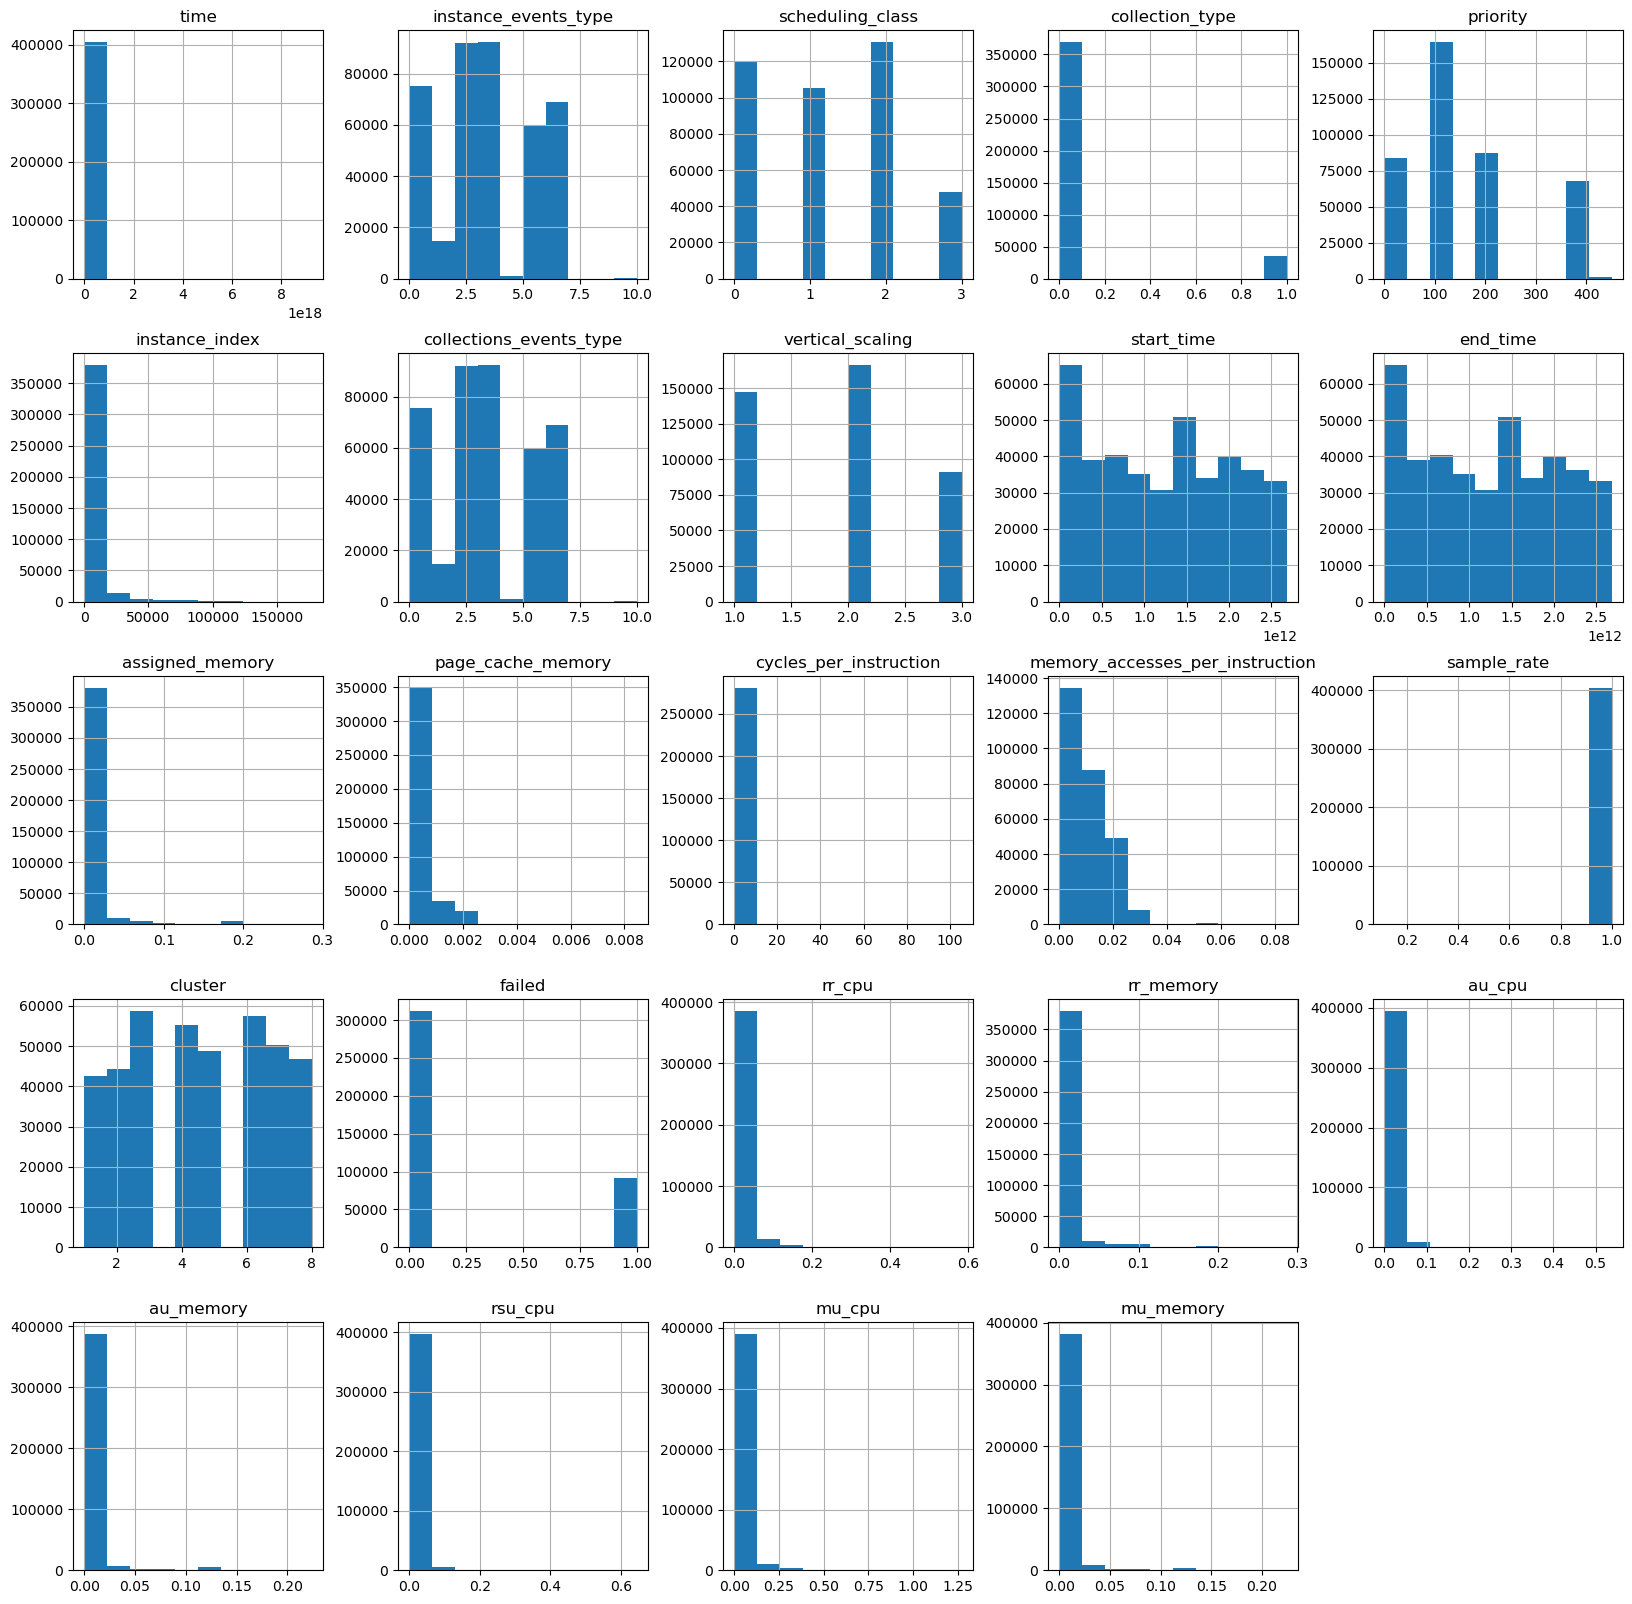

In [19]:
dff.hist(figsize=(20,20))

In [20]:
dff.to_csv("foreda.csv", index=False)